# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how="left")

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Checking the number of mice.
number_of_mice = combined_df['Mouse ID'].nunique()
print("Number of mice: ", number_of_mice)


Number of mice:  249


In [76]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
d_combined_df = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
d_combined_df

array(['g989'], dtype=object)

In [60]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df["Mouse ID"] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [79]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"].isin(d_combined_df)==False]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [80]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_df['Mouse ID'].nunique()
print("Number of mice: ", number_of_mice)

Number of mice:  248


## Summary Statistics

In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volume = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor_volume = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_dev_tumor_volume = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
std_err_tumor_volume = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume":median_tumor_volume, 
                          "Tumor Volume Variance": variance_tumor_volume, "Tumor Volume Std. Dev.": std_dev_tumor_volume,
                           "Tumor Volume Std. Err.": std_err_tumor_volume })
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
agg_summary_df = clean_df.groupby(clean_df["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(['mean','median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

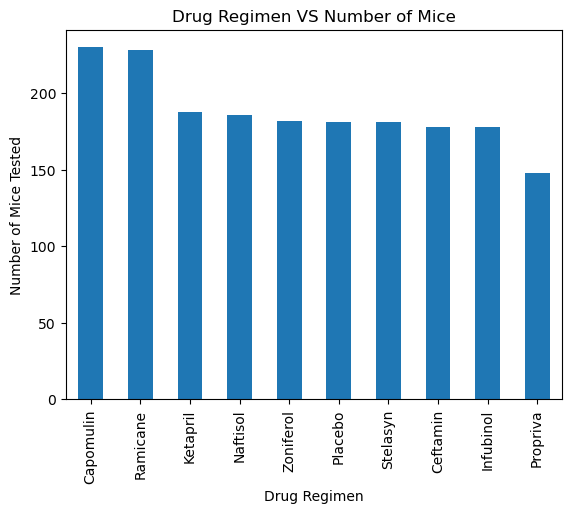

In [83]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar = clean_df['Timepoint'].groupby(clean_df['Drug Regimen']).count().sort_values(ascending=False)
bar_chart = bar.plot(kind="bar", title="Drug Regimen VS Number of Mice")
bar_chart.set_xlabel('Drug Regimen')
bar_chart.set_ylabel('Number of Mice Tested')
plt.show()


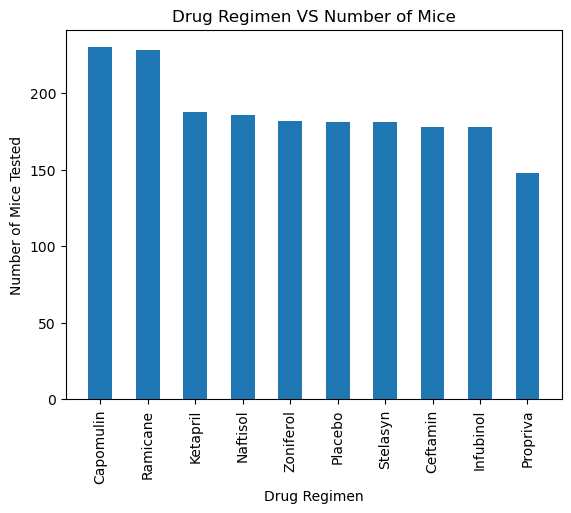

In [84]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar = clean_df['Timepoint'].groupby(clean_df['Drug Regimen']).count().sort_values(ascending=False).reset_index(drop=False)
df = pd.DataFrame(bar)
x_axis = df["Drug Regimen"]
y_axis = df["Timepoint"]
plt.bar(x_axis, y_axis, align="center", width=0.5)
plt.title("Drug Regimen VS Number of Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Mice Tested")
plt.show()


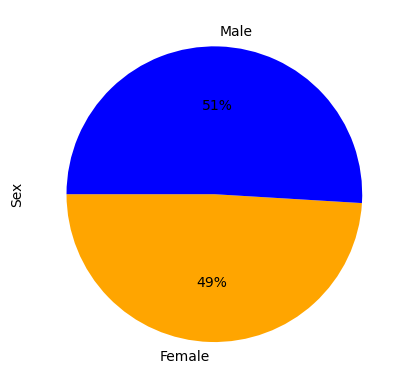

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sizes = clean_df["Sex"].value_counts().sort_values()
colors = ['orange', 'blue']
branch_pie = sizes.plot(kind="pie", y='Sex',startangle=180, colors=colors, autopct='%1.0f%%')
plt.show()

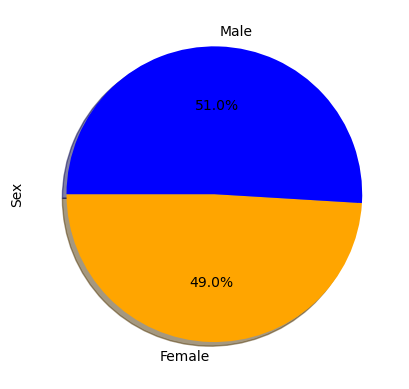

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = clean_df["Sex"].unique()
sizes = clean_df["Sex"].value_counts().sort_values()
colors = ['orange', 'blue']
plt.pie(sizes, labels=labels, 
        autopct="%1.1f%%",colors=colors, shadow=True, startangle=180)
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged= pd.merge(clean_df, greatest_timepoint, on='Mouse ID')
merged


,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [70]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumour_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

 # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:

    # add subset 
        tumour_volume = merged.loc[merged["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    #if merged.loc[merged['Drug Regimen'] == treatment]:
        #for volume in merged['Tumor Volume (mm3)']: 
     #   tumour_volume.append(merged['Tumor Volume (mm3)'].max())

tumour_volume
    
    # Determine outliers using upper and lower bounds
q1 = tumour_volume.quantile(0.25)
q3 = tumour_volume.quantile(0.75)
iqr = q3 - q1 

lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Values below 32.81891142624998 could be outliers.
Values above 71.19095325625001 could be outliers.


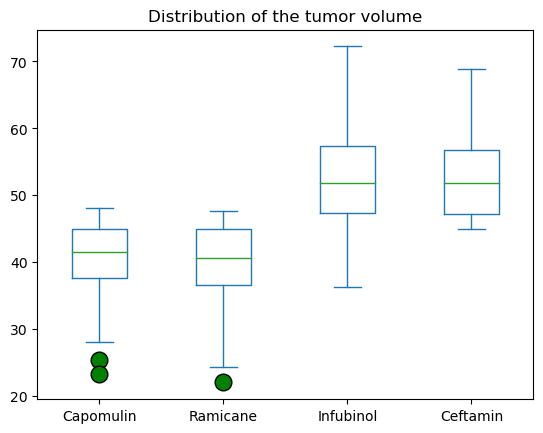

In [71]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
ramicane = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
infubinol = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']
ceftamin = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']
#fig1, ax1 = plt.subplots()
#ax1.set_title('Distribution of the tumor volume for Capomulin')
#ax1.set_ylabel('Tumor Volume (mm3)')
#ax1.boxplot(capomulin)
#plt.show()

#fig2, ax2 = plt.subplots()
#ax2.set_title('Distribution of the tumor volume for Ramicane')
#ax2.set_ylabel('Tumor Volume (mm3)')
#ax2.boxplot(ramicane)
#plt.show()

data = pd.DataFrame({"Capomulin": capomulin, "Ramicane": ramicane, "Infubinol": infubinol, "Ceftamin": ceftamin})
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
ax = data[["Capomulin","Ramicane","Infubinol", "Ceftamin"]].plot(kind='box', title='Distribution of the tumor volume', flierprops=flierprops)
plt.show()


## Line and Scatter Plots

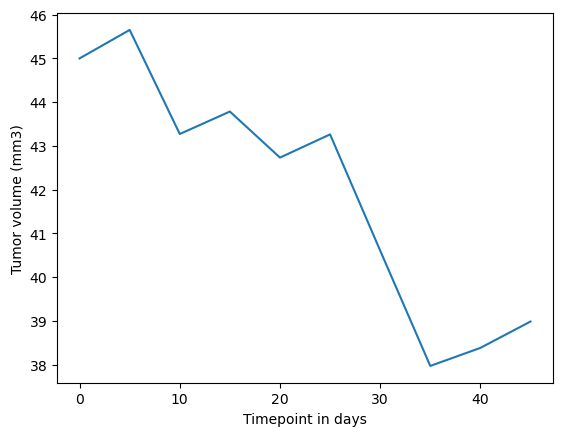

In [90]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_tumor_volume = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse = capomulin_tumor_volume.loc[capomulin_tumor_volume['Mouse ID'] == 'b128']
plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint in days')
plt.ylabel('Tumor volume (mm3)')
plt.show()

C:\Users\TheCr\AppData\Local\Temp\ipykernel_29228\353033665.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_mouse_weight = capomulin_tumor_volume_average.groupby(['Mouse ID']).mean()


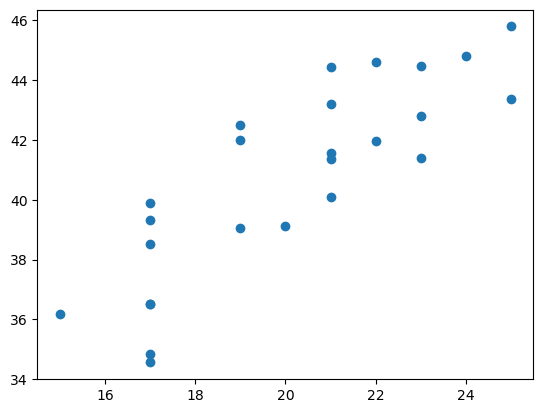

In [91]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_tumor_volume_average = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_mouse_weight = capomulin_tumor_volume_average.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_mouse_weight['Weight (g)'], capomulin_mouse_weight['Tumor Volume (mm3)'])
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


C:\Users\TheCr\AppData\Local\Temp\ipykernel_29228\429180407.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_mouse_weight = capomulin_tumor_volume_average.groupby(['Mouse ID']).mean()


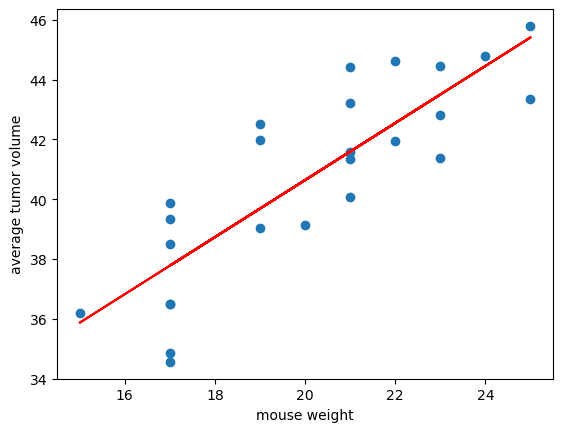

In [92]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_tumor_volume_average = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_mouse_weight = capomulin_tumor_volume_average.groupby(['Mouse ID']).mean()
mouse_weight = capomulin_mouse_weight['Weight (g)'] 
average_tumor_volume = capomulin_mouse_weight['Tumor Volume (mm3)']
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,average_tumor_volume)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('mouse weight')
plt.ylabel('average tumor volume')
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()